In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def square_grain_growth_mc_model(N,mu,E_b,Temp,iters):
    
    """
    
    Produces a square crystal lattice that undergoes grain growth of a crystal solution using Monte Carlo modelling, for
    given system conditions.
    mu_kB = chemical potential over Boltzmann's constant with units Kelvin
    Eb_kB = energy of bonds to neighbours over Boltzmann's constant with units Kelvin
    T = initial temperature kept constant in Kelvin
    iters = the number of iterations be repeat the monte carlo simulation representing propagation through time
    
    """
    
    # Creating an array for the sites of a square lattice
    # The elements of the lattice array represent the height h at lattice site i; which corresponds to a growth units at the site
    
    # creating an array for the square lattice with coordination number c = 4
    # we create an array of zeros to represent a flat surface with no growths on it

    lattice = np.ones((N,N))

    # The coordination for out square lattice is always 4

    c = 4

    # Choosing a random coordinates from the lattice

    for t in range(iters):
        i = np.random.randint(0,N)
        j = np.random.randint(0,N)

            # Using n to denote the number of nearest neighbours

            # This repeats at the boundaries simulating that the lattice is an infinite repeat of itself at the borders

        for I in range(i-1,i+1,2):
            for J in range(j-1,j+1,2):

                if I == N:
                    lattice[I+1,J] == lattice[0,J]
                elif J == N:
                    lattice[I,J+1] == lattice[I,0]
                elif I == 0:
                    lattice[I-1,J] == lattice[-1,J]
                elif J == 0:
                    lattice[I,J-1] == lattice[I,-1]

                n = lattice[I-1,J] + lattice[I+1,J] + lattice[I,J-1] + lattice[I,J+1]

                # Calculating W+, W- and W-max

                W_p = np.exp(mu/(Temp))
                W_m = np.exp(-((n-(c/2))*E_b)/(Temp))
                W_m_max = np.exp(-((-(c/2))*E_b)/(Temp))

                # Now computing the probabilities of growth rates being added or removed

                P_p = W_p / (W_p + W_m_max) # probability of adding a growth unit
                P_m = W_m / (W_p + W_m_max) # probability of removing a growth unit
                P_0 = 1 - P_p - P_m # probability of nothing happening at site

                # Choosing a random number between zero and one now

                N_r = np.random.random()

                if 0 < N_r < P_p:
                    lattice[i,j] += 1
                elif P_p < N_r < P_p + P_m:
                    lattice[i,j] -= 1
                else:
                    lattice[i,j] += 0
        
        
        
    return lattice

In [3]:
# # Testing my surface growth function

# N = 25
# mu = 16
# E_b = 10
# T = 300
# iters = 200000
# crystal = square_grain_growth_mc_model(N,mu,E_b,T,iters)

# # Creating a plotting grid

# x = np.arange(1,N+1,1)
# y = np.arange(1,N+1,1)
# x2D , y2D = np.meshgrid(x,y)

# fig = plt.figure(figsize=(10,3))

# # 2D plot

# plot_2d = fig.add_subplot(121)
# crystal_2d = plot_2d.imshow(crystal)
# #divider = make_axes_locatable(plot_2d)
# #fig.colorbar(crystal_2d)

# # 3D plot

# plot_3d = fig.add_subplot(122,projection='3d')
# crystal_3d = plot_3d.plot_surface(y2D,x2D,crystal,cmap='viridis')
# plt.subplots_adjust(wspace=0.4)

In [4]:
def expected_height(crystal):
    
    """
    
    Calculating the average number of growth units for a square lattice crystal model
    crystal = the crystal lattice array
    
    """
    
    # Calculating the average surface height

    expected_s = np.sum(crystal) / len(crystal)
    
    return expected_s

def surface_roughness(crystal,expected_s):
    
    """
    
    Determining the roughness of a surface after a crystal has been formed on it for a given amount of time
    crystal = the crystal lattice model
    expected_s = the average number of growth units at a site for the crystal lattice
    
    """
    
    # Calculating surface roughness

    crystal_squared = crystal * crystal # calculating the square of each e
    s_squared = np.sum(crystal_squared)
    exp_s_squared = s_squared / len(crystal)
    surface_rough = exp_s_squared - ((expected_s) ** 2)
    
    return surface_rough

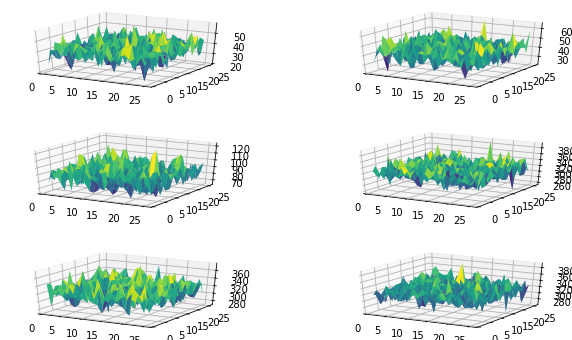

In [8]:
# Iterating my monte carlo simulation for different values of chemical potential mu
# Extreme case of for chemical potential is 1
# Manually choosing the values to see variations in crystal formation

mu = np.array([0,1,10,100,1000,5000])

# Initialising my variables that I'm not varying so they stay constant

N = 25
E_b = 1
T = 10
iters = 200000

x = np.arange(1,N+1,1)
y = np.arange(1,N+1,1)
x2D , y2D = np.meshgrid(x,y)

# Iterating my function for different chemical potentials

i = 0
crystal = np.zeros((len(mu),N,N))
mu_fig = plt.figure(figsize=(10,6))
ax_mu = []
roughness_mu = np.zeros((len(mu),2))

for i in range(len(mu)):
    formation = square_grain_growth_mc_model(N,mu[i],E_b * T,T,iters) # testing for the extreme case of chemical potential = 1
    crystal[i] = formation
    s_bar = expected_height(crystal[i])
    #growth[i] = np.sum(s_bar[i]) / i # not really looking at growth rate in this sim just looking at how the crystal turns out
    roughness_mu[i] = np.array([mu[i],surface_roughness(crystal[i],s_bar)])
    
    # Now creating 3d plots for each of these crystal formations for different binding energies
    
    ax_mu.append(mu_fig.add_subplot(len(mu) / 2,2,i+1,projection='3d'))
    ax_mu[i].plot_surface(y2D,x2D,crystal[i],cmap='viridis')
    plt.subplots_adjust(wspace=0.4,hspace=0.4)

plt.savefig('growth models.pdf')

In [9]:
def single_mc_growth(lattice,mu,E_b,Temp):
    
    """
    
    Produces a square crystal lattice that undergoes grain growth of a crystal solution using Monte Carlo modelling, for
    given system conditions.
    mu_kB = chemical potential over Boltzmann's constant with units Kelvin
    Eb_kB = energy of bonds to neighbours over Boltzmann's constant with units Kelvin
    T = initial temperature kept constant in Kelvin
    iters = the number of iterations be repeat the monte carlo simulation representing propagation through time
    
    """
    
    # Creating an array for the sites of a square lattice
    # The elements of the lattice array represent the height h at lattice site i; which corresponds to a growth units at the site
    
    # creating an array for the square lattice with coordination number c = 4
    # we create an array of zeros to represent a flat surface with no growths on it

    # The coordination for out square lattice is always 4

    c = 4

    # Choosing a random coordinates from the lattice

    i = np.random.randint(0,N)
    j = np.random.randint(0,N)

            # Using n to denote the number of nearest neighbours

            # This repeats at the boundaries simulating that the lattice is an infinite repeat of itself at the borders

    for I in range(i-1,i+1,2):
        for J in range(j-1,j+1,2):

            if I == N:
                lattice[I+1,J] == lattice[0,J]
            elif J == N:
                lattice[I,J+1] == lattice[I,0]
            elif I == 0:
                lattice[I-1,J] == lattice[-1,J]
            elif J == 0:
                lattice[I,J-1] == lattice[I,-1]

            n = lattice[I-1,J] + lattice[I+1,J] + lattice[I,J-1] + lattice[I,J+1]

            # Calculating W+, W- and W-max

            W_p = np.exp(mu/(Temp))
            W_m = np.exp(-((n-(c/2))*E_b)/(Temp))
            W_m_max = np.exp(-((-(c/2))*E_b)/(Temp))

            # Now computing the probabilities of growth rates being added or removed

            P_p = W_p / (W_p + W_m_max) # probability of adding a growth unit
            P_m = W_m / (W_p + W_m_max) # probability of removing a growth unit
            P_0 = 1 - P_p - P_m # probability of nothing happening at site

            # Choosing a random number between zero and one now

            N_r = np.random.random()

            if 0 < N_r < P_p:
                lattice[i,j] += 1
            elif P_p < N_r < P_p + P_m:
                lattice[i,j] -= 1
            else:
                lattice[i,j] += 0
        
        
        
    return lattice

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


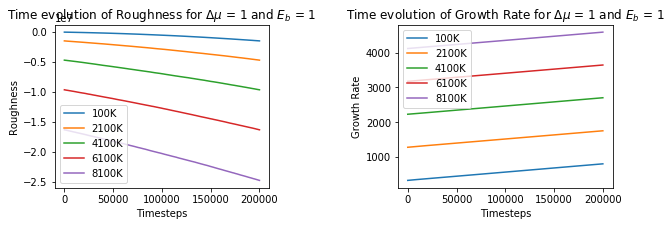

In [19]:
N = 25
lattice = np.random.randint(5,high=21,size=(N,N))
T = np.arange(100,10000,2000)
mu = 1
E_b = 1
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))

# Initiating simulation and iterating through my different temperature values and timesteps

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b*T[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
rough_title = 'Time evolution of Roughness for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
roughness.set_title(rough_title)
roughness.set_xlabel('Timesteps')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_title = 'Time evolution of Growth Rate for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
growth_rate.set_title(growth_title)
growth_rate.set_xlabel('Timesteps')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.6,hspace=0.5)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


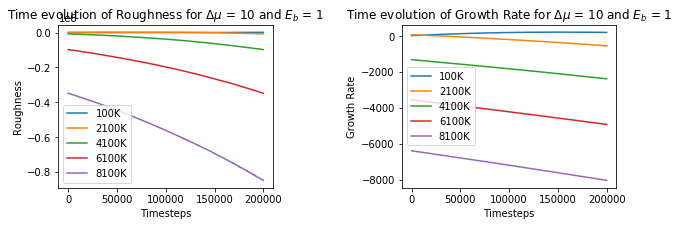

In [11]:
N = 25
lattice = np.ones((N,N))
T = np.arange(100,10000,2000)
mu = 10
E_b = 1
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))

# Initiating simulation and iterating through my different temperature values and timesteps

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b*T[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
rough_title = 'Time evolution of Roughness for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
roughness.set_title(rough_title)
roughness.set_xlabel('Timesteps')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_title = 'Time evolution of Growth Rate for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
growth_rate.set_title(growth_title)
growth_rate.set_xlabel('Timesteps')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.6,hspace=0.5)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


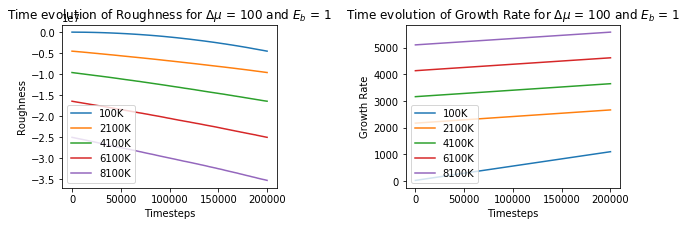

In [12]:
N = 25
lattice = np.ones((N,N))
T = np.arange(100,10000,2000)
mu = 100
E_b = 1
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))

# Initiating simulation and iterating through my different temperature values and timesteps

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b*T[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
rough_title = 'Time evolution of Roughness for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
roughness.set_title(rough_title)
roughness.set_xlabel('Timesteps')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_title = 'Time evolution of Growth Rate for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
growth_rate.set_title(growth_title)
growth_rate.set_xlabel('Timesteps')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.6,hspace=0.5)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


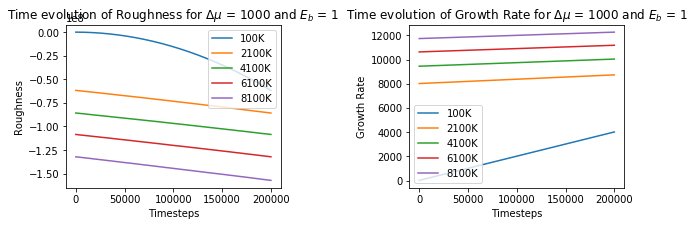

In [15]:
N = 25
lattice = np.ones((N,N))
T = np.arange(100,10000,2000)
mu = 1000
E_b = 1
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))

# Initiating simulation and iterating through my different temperature values and timesteps

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b*T[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
rough_title = 'Time evolution of Roughness for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
roughness.set_title(rough_title)
roughness.set_xlabel('Timesteps')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_title = 'Time evolution of Growth Rate for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
growth_rate.set_title(growth_title)
growth_rate.set_xlabel('Timesteps')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.6,hspace=0.5)
plt.savefig('mu100eb1.pdf')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


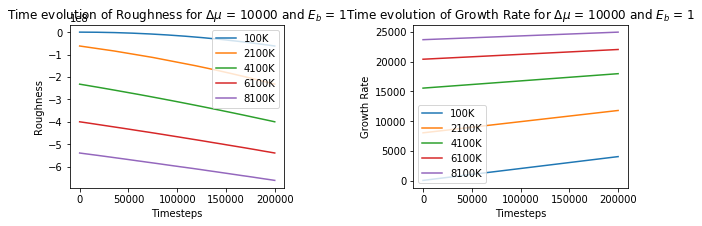

In [16]:
N = 25
lattice = np.ones((N,N))
T = np.arange(100,10000,2000)
mu = 10000
E_b = 1
iters = 200000

# Array for time on the x-axis

iters_array = np.ones(iters)
for i in range(iters):
    iters_array[i] = i

# Investigating the growth of the lattice in its equilibrium state for different temperatures

# Creating an array to store my roughness and growth for each temperature

rough = np.zeros((len(T),iters))
growth = np.zeros((len(T),iters))
s_bar = np.zeros((len(T),iters))

# Initiating simulation and iterating through my different temperature values and timesteps

for i in range(len(T)):
    for j in range(iters):
        crystal = single_mc_growth(lattice,mu,E_b*T[i],T[i])
        s_bar[i,j] = expected_height(crystal)
        growth[i,j] = np.sum(s_bar[i,:j]) / j
        rough[i,j] = surface_roughness(crystal,s_bar[i,j])
        lattice = crystal

# Plotting my equilibrium plots for each temperature on the same graph

fig = plt.figure(figsize=(10,3))
roughness = fig.add_subplot(121)
growth_rate = fig.add_subplot(122)
for i in range(len(rough)):
    rough_label = '{}K'.format(T[i])
    roughness.plot(iters_array,rough[i],label=rough_label)
    growth_rate_label = '{}K'.format(T[i])
    growth_rate.plot(iters_array,growth[i],label=growth_rate_label)
rough_title = 'Time evolution of Roughness for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
roughness.set_title(rough_title)
roughness.set_xlabel('Timesteps')
roughness.set_ylabel('Roughness')
roughness.legend(loc='best')
growth_title = 'Time evolution of Growth Rate for $\Delta \mu$ = {0} and $E_b$ = {1}'.format(mu,E_b)
growth_rate.set_title(growth_title)
growth_rate.set_xlabel('Timesteps')
growth_rate.set_ylabel('Growth Rate')
growth_rate.legend(loc='best')
plt.subplots_adjust(wspace=0.6,hspace=0.5)
plt.savefig('mu10000eb1.pdf')